Project : Sales Performance Dashboard

Goal: Understand key metrics and trends in sales data.

Skills: Summary statistics, correlation, groupby, filtering

Tools: Python (Pandas, Matplotlib, Seaborn) or Power BI

Deliverables: KPI report, trend charts, product/category insights

Concepts:

Mean, median, mode, variance, std

Correlation & scatter plots

Pivot tables, group-by summaries

Bar, pie, line charts

to find answers of:

What are the total sales and profit trends?

Which departments or items are top performers?

How does performance vary over time or location?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns when printing DataFrames
pd.set_option('display.max_columns', None)

# Use a consistent style
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load data
df = pd.read_csv("E:\projects for core statistics in data science\sales_performance_dashboard\Warehouse_and_Retail_Sales.csv")

In [5]:
# quick look at the data
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [7]:
# Check for missing values
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [8]:
# Quick statistics for numeric columns
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


Here we check:

Column names, data types

Missing values

Basic numeric stats

In [9]:
# 1. Rename columns to remove spaces for easier coding
df.columns = df.columns.str.strip().str.replace(" ", "_").str.upper()

In [10]:
# 2. Create Month-Year column
df['MONTH_YEAR'] = pd.PeriodIndex.from_fields(year=df['YEAR'], month=df['MONTH'], freq='M')

In [11]:
# 3. Convert categorical-like columns
cat_cols = ['SUPPLIER', 'ITEM_CODE', 'ITEM_DESCRIPTION', 'ITEM_TYPE']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [12]:
# 4. Ensure sales columns are numeric
sales_cols = ['RETAIL_SALES', 'RETAIL_TRANSFERS', 'WAREHOUSE_SALES']
df[sales_cols] = df[sales_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
# 5. Handle missing numeric values with median
df[sales_cols] = df[sales_cols].fillna(df[sales_cols].median())

In [14]:
# 6. Final check
print("Final shape:", df.shape)
df.head()

Final shape: (307645, 10)


,YEAR,MONTH,SUPPLIER,ITEM_CODE,ITEM_DESCRIPTION,ITEM_TYPE,RETAIL_SALES,RETAIL_TRANSFERS,WAREHOUSE_SALES,MONTH_YEAR
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01


Summary Statistics (KPI Calculation)

In [15]:
# 1. Overall KPIs
total_retail_sales = df['RETAIL_SALES'].sum()
total_transfers = df['RETAIL_TRANSFERS'].sum()
total_warehouse_sales = df['WAREHOUSE_SALES'].sum()

print(f"Total Retail Sales: {total_retail_sales:,.0f}")
print(f"Total Retail Transfers: {total_transfers:,.0f}")
print(f"Total Warehouse Sales: {total_warehouse_sales:,.0f}")

Total Retail Sales: 2,160,900
Total Retail Transfers: 2,133,969
Total Warehouse Sales: 7,781,756


In [16]:
# 2. Top 5 suppliers by retail sales
top_suppliers = df.groupby('SUPPLIER')['RETAIL_SALES'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Suppliers by Retail Sales:\n", top_suppliers)


Top 5 Suppliers by Retail Sales:
 SUPPLIER
E & J GALLO WINERY          166170.53
DIAGEO NORTH AMERICA INC    145343.20
CONSTELLATION BRANDS        131664.79
ANHEUSER BUSCH INC          109960.82
JIM BEAM BRANDS CO           96164.04
Name: RETAIL_SALES, dtype: float64


In [17]:
# 3. Top 5 items by retail sales
top_items = df.groupby('ITEM_DESCRIPTION')['RETAIL_SALES'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Items by Retail Sales:\n", top_items)


Top 5 Items by Retail Sales:
 ITEM_DESCRIPTION
TITO'S HANDMADE VODKA - 1.75L    27580.5
CORONA EXTRA LOOSE NR - 12OZ     25064.0
HEINEKEN LOOSE NR - 12OZ         17761.0
MILLER LITE 30PK CAN - 12OZ      14440.0
BUD LIGHT 30PK CAN               12299.0
Name: RETAIL_SALES, dtype: float64


In [18]:
# 4. Average monthly sales
avg_monthly_sales = df.groupby('MONTH_YEAR')['RETAIL_SALES'].sum().mean()
print(f"\nAverage Monthly Retail Sales: {avg_monthly_sales:,.0f}")


Average Monthly Retail Sales: 90,038


Visualizations

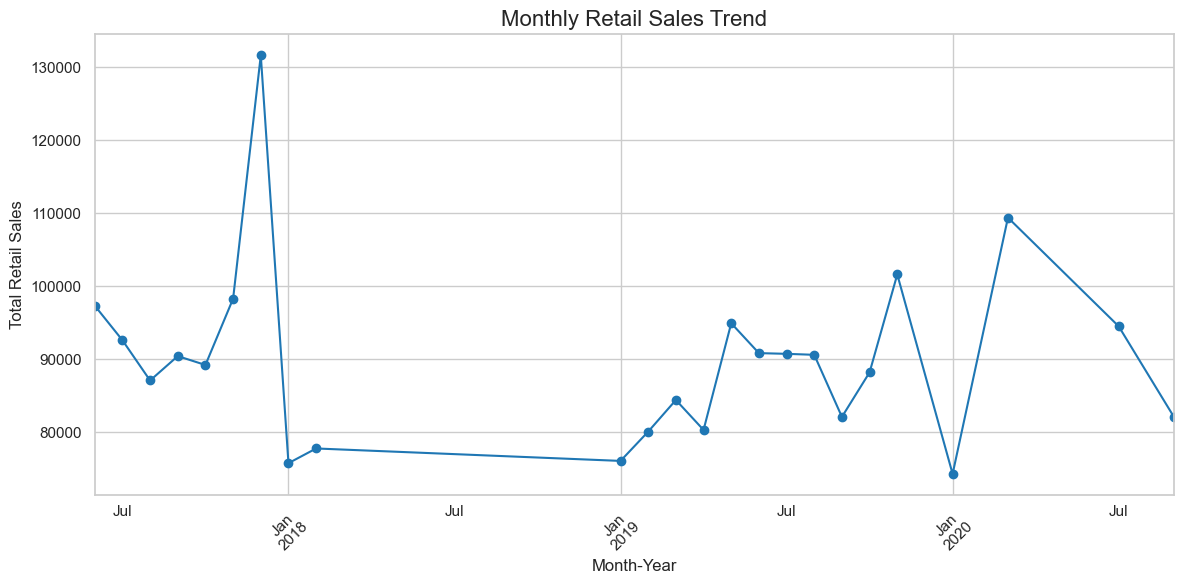

In [20]:
# 1. Monthly Retail Sales Trend

monthly_sales = df.groupby('MONTH_YEAR')['RETAIL_SALES'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='tab:blue')
plt.title('Monthly Retail Sales Trend', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/monthly_retail_sales_trend.png', dpi=300)
plt.show()

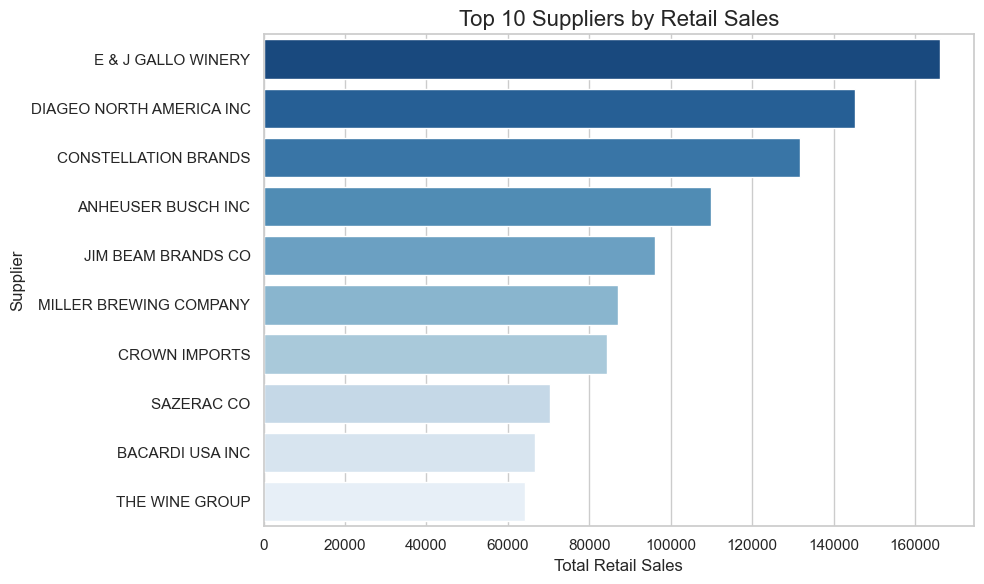

In [22]:
# 2. Top 10 Suppliers by Total Retail Sales (fixed)

# Ensure SUPPLIER is string
df['SUPPLIER'] = df['SUPPLIER'].astype(str)

# Aggregate and directly pick top 10
top_suppliers = (
    df.groupby('SUPPLIER', as_index=False)['RETAIL_SALES']
      .sum()
      .nlargest(10, 'RETAIL_SALES')
)

# Truncate long names
top_suppliers['Short_Name'] = top_suppliers['SUPPLIER'].apply(
    lambda x: x if len(x) <= 25 else x[:22] + '...'
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_suppliers,
    x='RETAIL_SALES',
    y='Short_Name',
    palette='Blues_r'
)
plt.title('Top 10 Suppliers by Retail Sales', fontsize=16)
plt.xlabel('Total Retail Sales')
plt.ylabel('Supplier')
plt.tight_layout()
plt.savefig('visuals/top_suppliers.png', dpi=300)
plt.show()


In [ ]:
# Optimize groupby with nlargest to avoid sorting entire column
top_items = (
    df.groupby('ITEM_DESCRIPTION', as_index=False)['RETAIL_SALES']
      .sum()
      .nlargest(10, 'RETAIL_SALES')
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_items,
    x='RETAIL_SALES',
    y='ITEM_DESCRIPTION',
    palette='Greens_r'
)
plt.title('Top 10 Items by Retail Sales', fontsize=16)
plt.xlabel('Total Retail Sales')
plt.ylabel('Item Description')
plt.tight_layout()
plt.savefig('visuals/top_items.png', dpi=300)
plt.show()


In [ ]:
# 4. Retail vs Warehouse Sales Over Time

monthly_compare = df.groupby('MONTH_YEAR')[['RETAIL_SALES', 'WAREHOUSE_SALES']].sum()

plt.figure(figsize=(12,6))
monthly_compare.plot(kind='bar', stacked=True, figsize=(12,6), color=['tab:blue', 'tab:orange'])
plt.title('Retail vs Warehouse Sales Over Time', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/retail_vs_warehouse.png', dpi=300)
plt.show()

Monthly Retail Sales Trend → seasonality & growth/decline patterns.

Top 10 Suppliers → which suppliers drive revenue.

Top 10 Items → best-selling products.

Retail vs Warehouse Sales Over Time → how both channels perform over months.